# Examples from the ODA tutorial

Part 1 : Quickstart

In [6]:
#Importing relevant modules and functions

from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os 


In [7]:
# Build the dispatcher object->bridge between front-end and data server

disp = DispatcherAPI(url='https://www.astro.unige.ch/mmoda/dispatch-data',instrument='mock')

In [8]:
#List the instruments available 

instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

isgri
jemx
polar
antares
gw
spi_acs
legacysurvey
lightcurve-example
cta-example
gaia-andrii
fermi
mmoda-fink-backend


In [12]:
# Getting the description of the instrument

disp.get_instrument_description('jemx')
#print(type(disp.get_instrument_description('isgri'))) #->list

[[{'instrumet': 'jemx'},
  {'prod_dict': {'jemx_image': 'jemx_image_query',
    'jemx_lc': 'jemx_lc_query',
    'jemx_spectrum': 'jemx_spectrum_query',
    'spectral_fit': 'spectral_fit_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "1E 1740.7-2942"}, {"name": "RA", "units": "deg", "value": 265.97845833}, {"name": "DEC", "units": "deg", "value": -29.74516667}, {"name": "T1", "units": "isot", "value": "2017-03-06T13:26:48.000"}, {"name": "T_format", "units": "str", "value": "isot"}, {"name": "T2", "units": "isot", "value": "2017-03-06T15:32:27.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "jemx_parameters"}, {"name": "user_catalog", "units": None, "value": None}, {"name": "scw_list", "units": None, "value": []}, {"name": "selected_catalog", "units": None, "value": None}, {"name": "radius", "units": "deg", "value": 4.0}, {"name": "max_pointings", "units": None, "value": 50}, {"name": "osa_version", "units": "str", 

In [15]:
# Getting description of product

disp.get_product_description(instrument='isgri',product_name='isgri_image')

[[{'instrumet': 'isgri'},
  {'prod_dict': {'isgri_image': 'isgri_image_query',
    'isgri_lc': 'isgri_lc_query',
    'isgri_spectrum': 'isgri_spectrum_query',
    'spectral_fit': 'spectral_fit_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "1E 1740.7-2942"}, {"name": "RA", "units": "deg", "value": 265.97845833}, {"name": "DEC", "units": "deg", "value": -29.74516667}, {"name": "T1", "units": "isot", "value": "2017-03-06T13:26:48.000"}, {"name": "T_format", "units": "str", "value": "isot"}, {"name": "T2", "units": "isot", "value": "2017-03-06T15:32:27.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "isgri_parameters"}, {"name": "user_catalog", "units": None, "value": None}, {"name": "scw_list", "units": None, "value": []}, {"name": "selected_catalog", "units": None, "value": None}, {"name": "radius", "units": "deg", "value": 15.0}, {"name": "max_pointings", "units": None, "value": 50}, {"name": "osa_version", "units"

In [ ]:
# Bad query test

data_collection=disp.get_product(instrument='isgri',
                                 product='isgri_image',
                                 T1='2003-03-15T23:27:40.0',
                                 T2='2003-03-16T00:03:12.0',
                                 osa_version='OSA10.2',
                                 RA='a',#yeah here
                                 DEC=-37.844167,
                                 detection_threshold=5.0,
                                 radius=15.,
                                 product_type='Real')

In [35]:
# Good query test, getting the products so I guess from the ISGRI instrument,
# we get the data collected at a certain epoch(T1,T2) in an energy range (E1,
# E2) for a certain portion of the sky(RA, DEC).

data_collection=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:15.0',
                      E1_keV=20.0,
                      E2_keV=40.0,
                      osa_version='OSA10.2',
                      RA=257.815417,
                      DEC=-41.593417,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real', silent=True)

In [36]:
# ODA data structure

data_collection.show()

ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'product': 'mosaic', 'instrument': 'isgri', 'src_name': '', 'query_parameters': '[{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"name": "detection_threshold", "units": "sigma", "value": 5.0}, {"name": "image_scale_min", "units": None, "value": None}, {"name": "image_scale_max", "units": None, "value": None}]'}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



In [37]:
# To access the members of the data, either do it by name :

print(data_collection.mosaic_image_0_mosaic)

# Or by position in the list :

print(data_collection._p_list[0])

In [38]:
# Showing the catalog whatever that is ?
# In that portion of the sky data collected, probably these four elements are the only sources detected.
# Units of significance ?

data_collection.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int32,str12,float64,float64,float64,int32,int32,int32,float64
68,OAO 1657-415,17.827661514282227,255.19740295410156,-41.653175354003906,-32768,2,0,0.00014000000373926014
74,4U 1700-377,21.19563102722168,255.9771270751953,-37.83724594116211,-32768,2,0,0.0002800000074785203
77,GX 349+2,13.917550086975098,256.42901611328125,-36.41566467285156,-32768,2,0,0.0002800000074785203
130,GX 354-0,8.97690486907959,262.9885559082031,-33.82877731323242,-32768,2,0,0.0002800000074785203


In [39]:
# Creating a FITS file from a data collection instance:
# Can open the file with SAO->linear, min/max with some tweaking shows the 4 sources quite well.
# For coordinates : WCS->degrees and FK5
data_collection.mosaic_image_0_mosaic.write_fits_file('test.fits',overwrite=True)

Let's plot some stuff: Image plotting, lightcurves and spectra.

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 52713.977697 from DATE-OBS.
Set MJD-END to 52713.998368 from DATE-END'. [astropy.wcs.wcs]
c:\Users\kentb\miniconda3\envs\spacetech_env\Lib\site-packages\oda_api\plot_tools.py:99: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


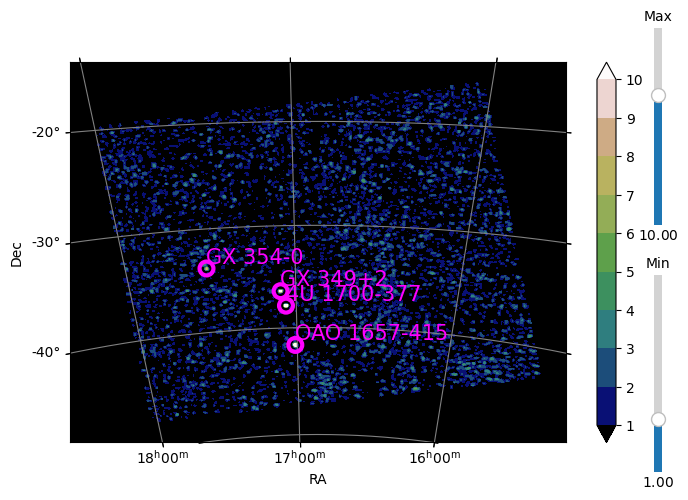

In [40]:
# Plot of the data with sources detected.
im = OdaImage(data_collection)
%matplotlib inline
im.show(unit_ID = 4)

The coordinate system used here is FK5: equatorial coordinate system linked to the Earth based on its J2000 position. Follows precession of Earth.

In [32]:
# To get the header of the FITS file : 
data_collection.mosaic_image_0_mosaic.data_unit[1].header

{'BASETYPE': 'DAL_GROUP',
 'BITPIX': 8,
 'CHECKSUM': '64H381G061G061G0',
 'COMMENT': '  on the next keyword which has the name CONTINUE.',
 'CONFIGUR': 'osa_2019-07-29T14:07:33',
 'CREATOR': 'ii_skyimage 5.4.4',
 'DATASUM': '910507346',
 'DATE': '2021-08-25T17:52:45',
 'DATE-END': '2003-03-15T23:57:39',
 'DATE-OBS': '2003-03-15T23:27:53',
 'DETNAM': 'ISGRI',
 'EXTNAME': 'GROUPING',
 'EXTREL': '7.2',
 'EXTVER': 1,
 'GCOUNT': 1,
 'GRPID1': -1,
 'GRPLC1': 'ogg.fits',
 'GRPNAME': 'ISGR-MOSA-IMA-IDX',
 'IDXMEMBR': 'ISGR-MOSA-IMA',
 'INSTRUME': 'IBIS',
 'ISDCLEVL': 'IMA',
 'LONGSTRN': 'OGIP 1.0',
 'MJDREF': 51544.0,
 'NAXIS': 2,
 'NAXIS1': 387,
 'NAXIS2': 4,
 'ORIGIN': 'ISDC',
 'PCOUNT': 0,
 'STAMP': '2021-08-25T17:52:45 ii_skyimage 5.4.4',
 'TELESCOP': 'INTEGRAL',
 'TFIELDS': 16,
 'TFORM1': '8A',
 'TFORM10': '1E',
 'TFORM11': '1E',
 'TFORM12': '1E',
 'TFORM13': '1D',
 'TFORM14': '1D',
 'TFORM15': '1D',
 'TFORM16': '1D',
 'TFORM2': '32A',
 'TFORM3': '1J',
 'TFORM4': '1J',
 'TFORM5': '256A',


In [42]:
# Let's plot some lightcurves now. The product now is "isgri_lc" as opposed to "isgri_image"
# We take the same portion of the sky.

data_collection_lc=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=70,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      radius=15.,
                      product_type='Real',silent=True)